In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import os, sys

project_root = '/user_data/mmhender/featsynth/'
# sys.path.append(os.path.join(project_root, 'code'))
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils
from behav_analysis import analyze_expt4, analyze_expt5

In [4]:
super_names, super_cbinds, basic_names, basic_inds, \
        super_names_long, super_inds_long, n_basic, n_super, n_basic_each_super = \
            analyze_expt4.get_categ_info()

trial_data_all1, subjects1, cue_level_names, image_type_names = analyze_expt4.load_data()
trial_data_all2, subjects2, cue_level_names, image_type_names = analyze_expt5.load_data()
 
n_subjects1 = len(subjects1)
n_subjects2 = len(subjects2)

n_cue_levels = len(cue_level_names)
n_image_types = len(image_type_names)

acc_by_condition1, dprime_by_condition1, propyes_by_condition1, rt_by_condition1 = analyze_expt4.get_perf_by_cond()
acc_by_condition2, dprime_by_condition2, propyes_by_condition2, rt_by_condition2 = analyze_expt5.get_perf_by_cond()


In [5]:
cue_level_colors = np.array([[93,192,219], [44,92,168]])/255
point_types = ['o','x']
markersize = 4;
xjitters = np.array([-0.2, 0.2])
barwidth = xjitters[1]*2

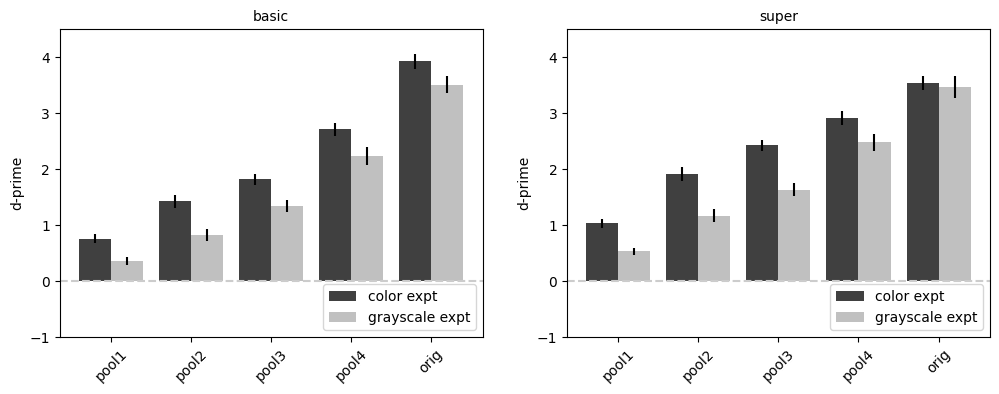

In [8]:
color_cond_colors = cm.gray(np.linspace(0,1,5))[[1,3],:]

plot_utils.set_all_font_sizes(10)

plt.figure(figsize=(12,4))

for cc, cue in enumerate(cue_level_names):

    
    ax = plt.subplot(1,2,cc+1)
    lh = []

    for ee, [ename, dvals] in enumerate(zip(['color expt','grayscale expt'], \
                                               [dprime_by_condition1, dprime_by_condition2])):


        vals = dvals[:,cc,:]
        n_subs_plot = vals.shape[0]

        meanvals = np.mean(vals, axis=0)
        semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)

        h = plt.bar(np.arange(n_image_types)+xjitters[ee], \
                meanvals, \
                color = color_cond_colors[ee,:], width=barwidth)
        plt.errorbar(np.arange(n_image_types)+xjitters[ee], \
                         meanvals, \
                         semvals, \
                         color = 'k', linestyle='none')
                        # color = color_cond_colors[ee,:])
        lh.append(h)

        plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)


    plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')

    ax.legend(lh, ['color expt','grayscale expt'], loc='lower right')

    plt.ylabel('d-prime')

    plt.ylim([-1, 4.5])

    plt.title('%s'%(cue_level_names[cc]))
    

In [9]:
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols


In [10]:
var1, var2, var3 = 'cue_level','image_type','color_cond'
model_str = 'value ~ C(%s) + C(%s) + C(%s)'%(var1, var2, var3)
model_str += ' + C(%s):C(%s)'%(var1, var2)
model_str += ' + C(%s):C(%s)'%(var1, var3)
model_str += ' + C(%s):C(%s)'%(var2, var3)
model_str += ' + C(%s):C(%s):C(%s)'%(var1, var2, var3)
model_str += ' + 1'
model_str

'value ~ C(cue_level) + C(image_type) + C(color_cond) + C(cue_level):C(image_type) + C(cue_level):C(color_cond) + C(image_type):C(color_cond) + C(cue_level):C(image_type):C(color_cond) + 1'

In [11]:
atab = []

for ee, [ename, dvals] in enumerate(zip(['color expt','grayscale expt'], \
                                           [dprime_by_condition1, dprime_by_condition2])):

    vals = dvals[:,:,:]

    for cc in range(n_cue_levels):
        for ii in range(n_image_types):
            for ss in range(vals.shape[0]):

                # [cue level, image type, color cond, value]
                atab.append([cc,ii,ee,vals[ss,cc,ii]])

df = pd.DataFrame(np.array(atab), columns=[var1, var2, var3,'value'])

model = ols(model_str, data = df).fit()

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(cue_level),1.0,6.483682,6.483682,16.486369,5.686696e-05
C(image_type),4.0,534.033403,133.508351,339.478104,5.627931e-141
C(color_cond),1.0,31.109125,31.109125,79.102669,1.078507e-17
C(cue_level):C(image_type),4.0,7.923687,1.980922,5.036985,5.489137e-04
C(cue_level):C(color_cond),1.0,0.037964,0.037964,0.096533,7.561602e-01
C(image_type):C(color_cond),4.0,3.089528,0.772382,1.963973,9.877684e-02
C(cue_level):C(image_type):C(color_cond),4.0,1.524850,0.381213,0.969327,4.238760e-01
Residual,500.0,196.637646,0.393275,NaN,NaN
